In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn
%matplotlib inline

In [48]:
df = pd.read_csv('/content/mobile_prices.csv')

In [49]:
df

,battery_power,dual_sim,four_g,int_memory,ram,three_g
0,1043,1,0,5,3476,0
1,841,1,1,61,3895,1
2,1807,0,0,27,2396,0
3,1546,1,1,25,3893,1
4,1434,0,1,49,1773,1
...,...,...,...,...,...,...
104,697,1,1,34,1694,1
105,1939,0,0,58,2593,0
106,1039,1,0,15,745,0
107,1605,0,1,51,1310,1


In [50]:
df.shape

(109, 6)

In [51]:
df.isnull().values.any()

False

In [52]:
df.describe()

,battery_power,dual_sim,four_g,int_memory,ram,three_g
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1276.422018,0.605505,0.431193,33.422018,2155.036697,0.697248
std,418.754421,0.491000,0.497530,16.754377,1124.025042,0.461571
min,529.000000,0.000000,0.000000,2.000000,305.000000,0.000000
25%,980.000000,0.000000,0.000000,20.000000,1248.000000,0.000000
50%,1206.000000,1.000000,0.000000,33.000000,2042.000000,1.000000
75%,1626.000000,1.000000,1.000000,48.000000,3048.000000,1.000000
max,1999.000000,1.000000,1.000000,64.000000,3953.000000,1.000000


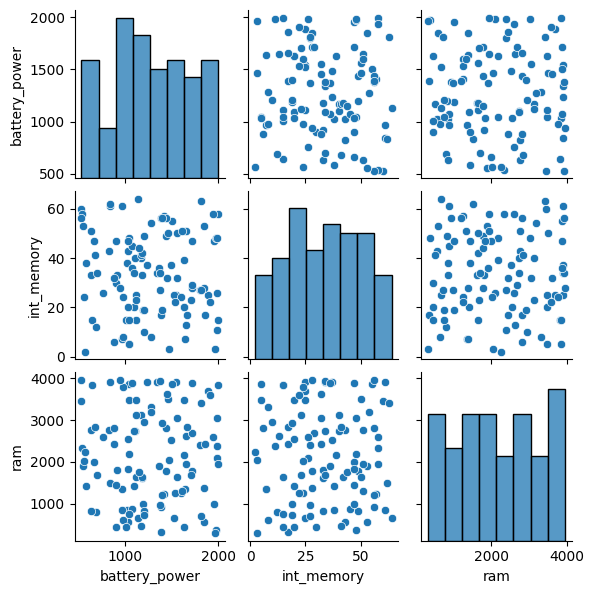

In [73]:
import seaborn as sns
sns.pairplot(df[['battery_power', 'int_memory', 'ram']], height=2)

In [74]:
import sklearn.cluster as cluster

In [61]:
kmeans = cluster.KMeans(n_clusters=4)

In [ ]:
kmeans = kmeans.fit(df[['ram','int_memory']])

In [63]:
kmeans.cluster_centers_

array([[ 679.08      ,   32.6       ],
       [3723.        ,   32.58333333],
       [2719.88888889,   31.25925926],
       [1670.6969697 ,   36.42424242]])

In [64]:
df['StorageCapacity_Cluster'] = kmeans.labels_

In [65]:
df

,battery_power,dual_sim,four_g,int_memory,ram,three_g,StorageCapacity_Cluster
0,1043,1,0,5,3476,0,1
1,841,1,1,61,3895,1,1
2,1807,0,0,27,2396,0,2
3,1546,1,1,25,3893,1,1
4,1434,0,1,49,1773,1,3
...,...,...,...,...,...,...,...
104,697,1,1,34,1694,1,3
105,1939,0,0,58,2593,0,2
106,1039,1,0,15,745,0,0
107,1605,0,1,51,1310,1,3


In [67]:
df['StorageCapacity_Cluster'].value_counts()

3    33
2    27
0    25
1    24
Name: StorageCapacity_Cluster, dtype: int64

<Axes: xlabel='int_memory', ylabel='ram'>

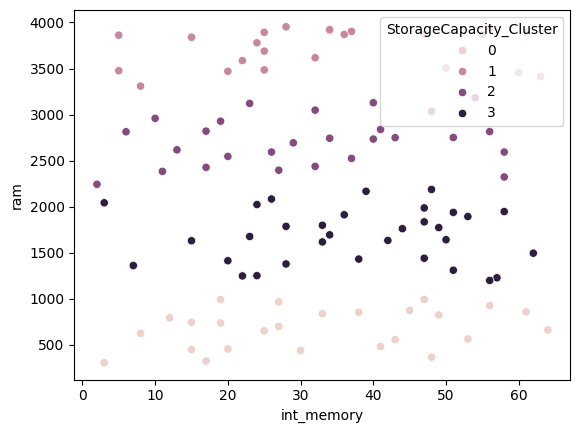

In [77]:
seaborn.scatterplot(x='int_memory',y='ram',hue='StorageCapacity_Cluster',data=df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.3333333333333333


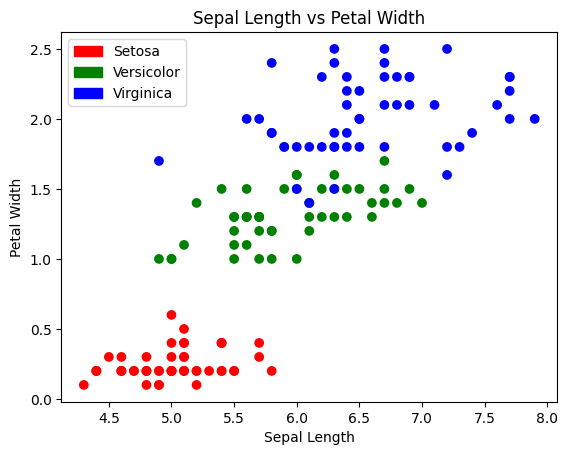

In [80]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

x = pd.DataFrame(iris.data, columns=['SL', 'SW', 'PL', 'PW'])
y = pd.DataFrame(iris.target, columns=['Target'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x_train)

predicted_y_test = iris_k_mean_model.predict(x_test)

accuracy = accuracy_score(predicted_y_test, y_test['Target'])
print("Accuracy:", accuracy)

plt.scatter(x['SL'], x['PW'], c=np.array(['red', 'green', 'blue'])[y['Target']])
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend(handles=[mpatches.Patch(color='red', label='Setosa'),
                    mpatches.Patch(color='green', label='Versicolor'),
                    mpatches.Patch(color='blue', label='Virginica')])
plt.show()

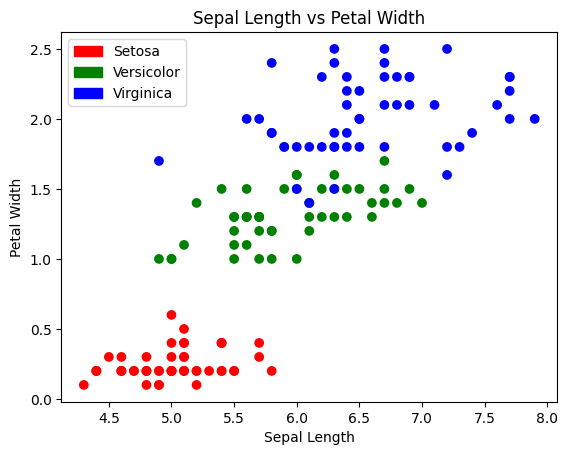

In [83]:
# Define legend handles
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

# Visualize the scatterplot
plt.scatter(x['SL'], x['PW'], c=colors[y['Target']])
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()
